In [2]:
######### Initial Setting ###########

import os
import pandas as pd

In [3]:
def CheckFolder():
    current_directory = os.getcwd()

    # 현재 경로에 두 개의 폴더가 존재하는지 확인
    folder1_exists = os.path.exists(os.path.join(current_directory, 'out_door_air_data'))
    folder2_exists = os.path.exists(os.path.join(current_directory, 'out_door_air_data_update'))

    # 결과 출력
    if folder1_exists and folder2_exists:
        print("현재 경로:", current_directory)
        print("out_door_air_data:", folder1_exists)
        print("out_door_air_data_update:", folder2_exists)
    else:
        print('폴더 구성 여부를 재확인 해주세요.')

CheckFolder()

현재 경로: /Users/jkky/Desktop/git/Airdeep
out_door_air_data: True
out_door_air_data_update: True


In [9]:
def MergeOutdoorData():
    folder_path = './out_door_air_data_update/'
    out_path = './out_door_air_data/'
    # 모든 CSV 파일을 저장할 빈 DataFrame 생성
    combined_data = pd.DataFrame()

    # 폴더 내의 모든 파일 목록을 가져와 처리
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)

            # CSV 파일을 읽어와 DataFrame에 추가
            df = pd.read_csv(file_path, encoding='euc-kr')
            combined_data = pd.concat([combined_data, df], ignore_index=True)

    # 날짜 열을 기준으로 정렬 (날짜 열 이름을 '날짜'로 가정)
    combined_data['일시'] = pd.to_datetime(combined_data['일시'])
    combined_data = combined_data.sort_values(by='일시')

    # 데이터 누락시 보간
    # 데이터프레임의 날짜/시간 열을 인덱스로 설정합니다.
    combined_data.set_index('일시', inplace=True)

    # 1분 간격으로 리샘플링합니다. 이때 누락된 데이터는 NaN으로 표시됩니다.
    combined_data = combined_data.resample('1T').mean()

    # 보간을 사용하여 누락된 데이터를 채웁니다. 여기서 method에는 적절한 보간 방법을 선택합니다.
    # 예: linear, time, nearest, 등
    combined_data = combined_data.interpolate(method='linear')
    combined_data.reset_index(inplace=True)
    
    # 데이터프레임에서 '일시' 열의 차이를 계산하여 1분 간격인지 확인
    time_diff = combined_data['일시'].diff()
    is_one_minute_interval = all(time_diff[1:] == pd.Timedelta(minutes=1))

    # 데이터프레임에서 null 값이 있는지 확인
    has_null_values = combined_data.isnull().values.any()

    if is_one_minute_interval:
        print("모든 행이 1분 간격으로 존재합니다.")
    else:
        print("행들 사이에 1분 간격이 아닌 경우가 있습니다.")
        non_one_minute_intervals = combined_data[time_diff != pd.Timedelta(minutes=1)]

        if non_one_minute_intervals.empty:
            print("모든 행이 1분 간격으로 존재합니다.")
        else:
            print("1분 간격이 아닌 부분:")
            print(non_one_minute_intervals)

    if not has_null_values:
        print("데이터프레임에 null 값이 없습니다.")
    else:
        print("데이터프레임에 null 값이 있습니다.")

    # 결과를 원하는 파일로 저장 (예: merged_data.csv)
    combined_data.to_csv(out_path + 'merged_data.csv', index=False, encoding='euc-kr')
    
    return combined_data

a = MergeOutdoorData()
a

모든 행이 1분 간격으로 존재합니다.
데이터프레임에 null 값이 없습니다.


,일시,지점,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),습도(%)
0,2023-05-27 00:01:00,119.0,18.6,0.0,302.2,0.8,75.5
1,2023-05-27 00:02:00,119.0,18.6,0.0,240.6,0.9,75.5
2,2023-05-27 00:03:00,119.0,18.6,0.0,272.1,0.7,75.8
3,2023-05-27 00:04:00,119.0,18.6,0.0,256.7,0.8,75.7
4,2023-05-27 00:05:00,119.0,18.5,0.0,256.5,1.1,75.8
...,...,...,...,...,...,...,...
164155,2023-09-17 23:56:00,119.0,22.7,0.0,242.2,0.3,92.9
164156,2023-09-17 23:57:00,119.0,22.7,0.0,253.2,0.1,92.8
164157,2023-09-17 23:58:00,119.0,22.7,0.0,233.9,0.6,92.8
164158,2023-09-17 23:59:00,119.0,22.7,0.0,238.9,0.7,92.8


모든 행이 1분 간격으로 존재합니다.
데이터프레임에 null 값이 없습니다.


/var/folders/cs/49q7g4d14rdcqv33gtxv0rg40000gn/T/ipykernel_83384/1062236019.py:25: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.tight_layout()
/var/folders/cs/49q7g4d14rdcqv33gtxv0rg40000gn/T/ipykernel_83384/1062236019.py:25: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  plt.tight_layout()
/var/folders/cs/49q7g4d14rdcqv33gtxv0rg40000gn/T/ipykernel_83384/1062236019.py:25: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  plt.tight_layout()
/var/folders/cs/49q7g4d14rdcqv33gtxv0rg40000gn/T/ipykernel_83384/1062236019.py:25: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
/var/folders/cs/49q7g4d14rdcqv33gtxv0rg40000gn/T/ipykernel_83384/1062236019.py:25: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  plt.tight_layout()
/var/folders/cs/49q7g4d14rdcqv33gtxv0rg40000gn/T/ipykernel_83384/1062236019.py:25: UserWa

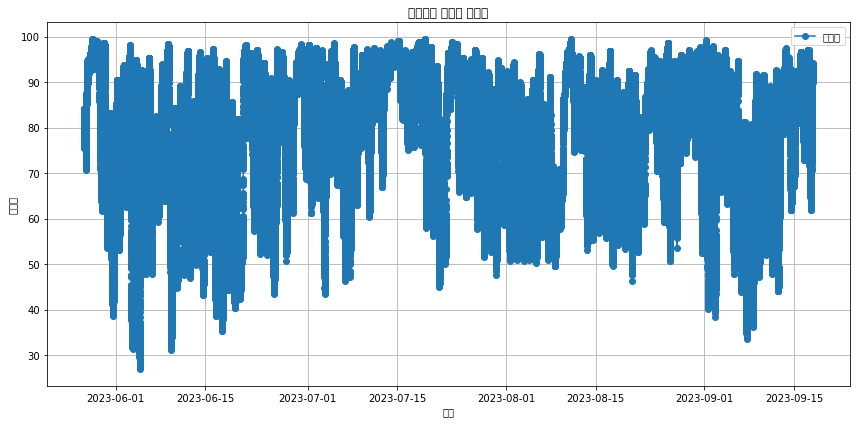

In [11]:
import matplotlib.pyplot as plt

# 데이터프레임을 생성하거나 불러옵니다.
# 예: df = pd.read_csv('your_data.csv')
df = MergeOutdoorData()
# 'timestamp' 열을 datetime 형식으로 변환합니다.
df['일시'] = pd.to_datetime(df['일시'])

# 'timestamp' 열을 인덱스로 설정합니다.
df.set_index('일시', inplace=True)

# 강수량 데이터를 y로 지정합니다. 이 부분에는 실제 데이터프레임에서 강수량 열의 이름을 사용하세요.
y = df['습도(%)']

# 그래프를 생성합니다.
plt.figure(figsize=(12, 6))  # 그래프 크기 설정
plt.plot(df.index, y, label='강수량', marker='o', linestyle='-')
plt.xlabel('시간')  # x축 레이블 설정
plt.ylabel('강수량')  # y축 레이블 설정
plt.title('시간대별 강수량 그래프')  # 그래프 제목 설정
plt.grid(True)  # 격자 표시
plt.legend()  # 범례 표시

# 그래프를 표시합니다.
plt.tight_layout()
plt.show()




